In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('data.csv')

# A la columna de Kilómetros le sacamos el km y lo convertimos a número
data['Kilómetros'] = data['Kilómetros'].str.replace(' km', '').str.replace(',', '').astype(int)

data = data[data['Marca'] == 'Toyota']
print(data['Modelo'].unique())

# Definir las características (features) y el objetivo (target)
X = data[['Kilómetros', 'Edad', 'Modelo']]
X = pd.get_dummies(X, columns=['Modelo'])
y = data['Precio']

# Visualizar los primeros registros para asegurarnos de que se han cargado correctamente
print(data.head())

# Normalizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_max = X_train.max()
X_train_min = X_train.min()
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
y_train_max = y_train.max()
y_test = y_test / y_train.max()
y_train = y_train / y_train.max()

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

['4Runner' 'C-HR' 'Corolla Cross' 'Hilux' 'Hilux SW4' 'Land Cruiser'
 'RAV4' 'SW4']
     Unnamed: 0   Marca   Modelo  Kilómetros        Precio  Edad
895         895  Toyota  4Runner      283000  27500.000000  32.0
896         896  Toyota  4Runner      340000  19000.000000  28.0
897         897  Toyota  4Runner      370000  10900.000000  27.0
898         898  Toyota  4Runner      199000  15865.384615  30.0
899         899  Toyota  4Runner      420000  12500.000000  28.0


Epoch 1/100, Train Loss: 0.012566243492377302, Test Loss: 0.009826913165549437
Epoch 2/100, Train Loss: 0.009113804864076277, Test Loss: 0.007734642208864291
Epoch 3/100, Train Loss: 0.008676213561557233, Test Loss: 0.007731267871956031
Epoch 4/100, Train Loss: 0.008668552075202266, Test Loss: 0.007811209497352441
Epoch 5/100, Train Loss: 0.00860853943352898, Test Loss: 0.007831232311824957
Epoch 6/100, Train Loss: 0.008598492053958276, Test Loss: 0.007948365062475204
Epoch 7/100, Train Loss: 0.008612228363441924, Test Loss: 0.007836472553511461
Epoch 8/100, Train Loss: 0.008548835874535143, Test Loss: 0.007828931168963512
Epoch 9/100, Train Loss: 0.008567691664211452, Test Loss: 0.0077745796491702395
Epoch 10/100, Train Loss: 0.00863384191567699, Test Loss: 0.007737893611192703
Epoch 11/100, Train Loss: 0.008683682690995434, Test Loss: 0.007953977988411983
Epoch 12/100, Train Loss: 0.008654701717508336, Test Loss: 0.007971584486464659
Epoch 13/100, Train Loss: 0.008570716017857194, Te

/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128, 1, 1])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([116, 1, 1])) that is different to the input size (torch.Size([116, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([126, 1, 1])) that is different to the input size (torch.Size([126, 1])). This will likely lead to incorrect results

Epoch 24/100, Train Loss: 0.008568315921972195, Test Loss: 0.0077689240376154585
Epoch 25/100, Train Loss: 0.008626668791597089, Test Loss: 0.007796530922253926
Epoch 26/100, Train Loss: 0.008562086732126772, Test Loss: 0.0077814883552491665
Epoch 27/100, Train Loss: 0.008629863344443342, Test Loss: 0.0077504028255740804
Epoch 28/100, Train Loss: 0.008648659607085088, Test Loss: 0.007784180964032809
Epoch 29/100, Train Loss: 0.00872170253812025, Test Loss: 0.007731795776635408
Epoch 30/100, Train Loss: 0.008567830043223998, Test Loss: 0.008102116640657187
Epoch 31/100, Train Loss: 0.00874420270944635, Test Loss: 0.00805788952857256
Epoch 32/100, Train Loss: 0.008563872271527847, Test Loss: 0.007788203811893861
Epoch 33/100, Train Loss: 0.008556526930381855, Test Loss: 0.007930727830777565
Epoch 34/100, Train Loss: 0.008541417346956829, Test Loss: 0.007734735185901324
Epoch 35/100, Train Loss: 0.008594152323591212, Test Loss: 0.007730454361687104
Epoch 36/100, Train Loss: 0.008641408251

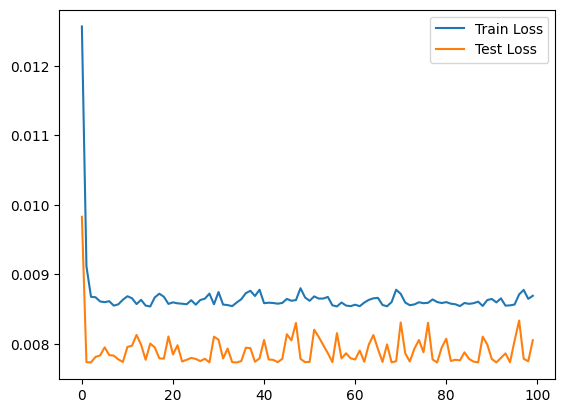

In [25]:
# Definir el tamaño del lote
batch_size = 128

# Crear un DataLoader para los datos de entrenamiento
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

# Crear un DataLoader para los datos de prueba
test_data = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# Definir la arquitectura de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            # nn.Linear(3, 64),
            nn.Linear(10, 16),
            nn.ReLU(),
            # nn.Linear(64, 64),
            # nn.Linear(64, 128),
            # nn.ReLU(),
            # nn.Linear(128, 64),
            nn.Linear(16, 32),
            nn.ReLU(),
            # nn.Linear(64, 1)
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)
    
# Crear una instancia de la red neuronal
model = NeuralNetwork().to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Entrenar la red neuronal
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [26]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device))
    loss = criterion(y_pred, y_test.unsqueeze(1).to(device))
    print(f"Test Loss: {loss.item()}")
    print(f"Error: {loss.item() }")

Test Loss: 0.008054911158978939
Error: 0.008054911158978939


/Users/ninarigal/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([382, 1, 1])) that is different to the input size (torch.Size([382, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [30]:
import numpy as np

print(data['Modelo'].unique())

# Normalizar las características (kilómetros y edad)
km_nuevo_scaled = 0
edad_nuevo_scaled = 0

# Combinar características codificadas y escaladas en un array de características
X_nuevo = np.array([0, 0, 0, 0, 0, 1, 0, 0, km_nuevo_scaled, edad_nuevo_scaled])

# Convertir el array de características a tensor de PyTorch
X_nuevo_tensor = torch.tensor(X_nuevo, dtype=torch.float32)

# Pasar las características del nuevo auto a través del modelo y obtener la predicción
model.eval()
with torch.no_grad():
    precio_predicho = model(X_nuevo_tensor.to(device)) 

print("El precio predicho para el nuevo auto es:", precio_predicho.item() * y_train_max)

['4Runner' 'C-HR' 'Corolla Cross' 'Hilux' 'Hilux SW4' 'Land Cruiser'
 'RAV4' 'SW4']
El precio predicho para el nuevo auto es: 33714.77983891964
